In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
data_count = 300

mu1 = np.array([3,3])
cov1 = np.eye(2)
classA = np.random.multivariate_normal(mu1, cov1, data_count)

mu2 = np.array([8,8])
cov2 = np.eye(2)
classB = np.random.multivariate_normal(mu2, cov2, data_count)

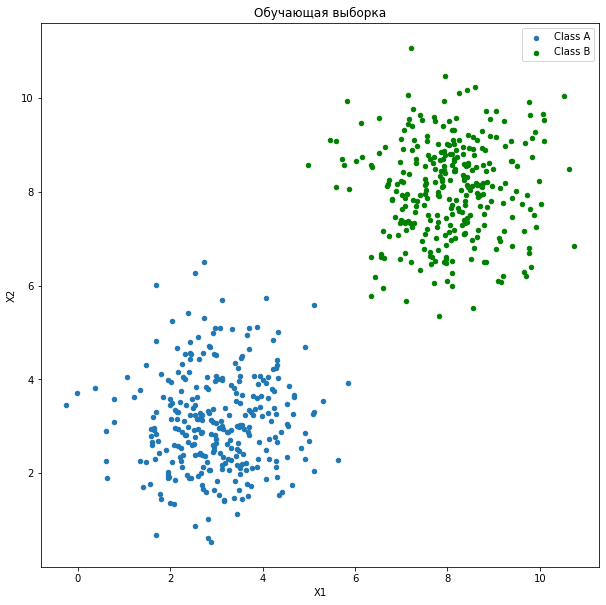

In [53]:
f, ax = plt.subplots(figsize=(10, 10))
sctterA = ax.scatter(classA[:,0], classA[:,1], s=20)
sctterB = ax.scatter(classB[:,0], classB[:,1], color = "green", s=20)
plt.title('Обучающая выборка')
plt.ylabel('X2')
plt.xlabel('X1')
plt.legend((sctterA, sctterB), ("Class A", "Class B"))
plt.show()

### Kernel (Ядро)

In [54]:
def Kernel(z) :
    """
    window function
    """
    if np.abs(z) > 0.5:
        return 0
    return 1

### Parzen-Rosenblatt estimation

In [55]:
def p(x, class_param):
    """
    h - ширина окна
    """
    h = 1
    s = 0
    for i in class_param:
        s += K((x-i)/h)
        
    return (1/(h*data_count))*s

### KDE Parzen-Rosenblatt

<ipython-input-56-e644e89cd3ab>:7: RuntimeWarning: divide by zero encountered in log
  to_classif1 = np.log(np.abs(p(X[i],classA[:,0]))) + np.log(np.abs(p(Y[j], classA[:,1])))
<ipython-input-56-e644e89cd3ab>:8: RuntimeWarning: divide by zero encountered in log
  to_classif2 = np.log(np.abs(p(X[i],classB[:,0]))) + np.log(np.abs(p(Y[j], classB[:,1])))


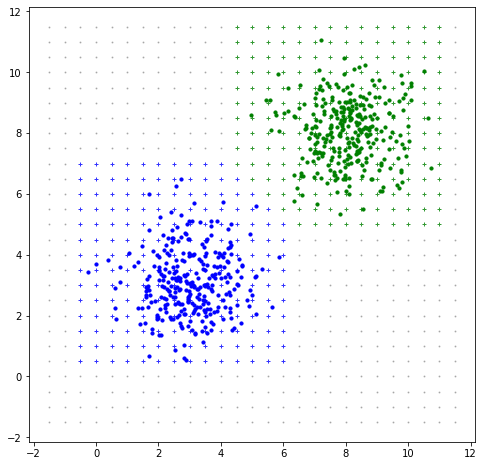

In [56]:
X = np.arange(-2, 12, 0.5)
Y = X
f, ax = plt.subplots(figsize=(8, 8))

for i in range(1, len(X)):
    for j in range(1,len(Y)):
        to_classif1 = np.log(np.abs(p(X[i],classA[:,0]))) + np.log(np.abs(p(Y[j], classA[:,1])))
        to_classif2 = np.log(np.abs(p(X[i],classB[:,0]))) + np.log(np.abs(p(Y[j], classB[:,1])))
        
        if round(to_classif1, 5) == round(to_classif2, 5):
             ax.plot(X[i],Y[j], marker = '.', markersize = 2, color = 'grey', alpha = 0.5)
        elif to_classif1 > to_classif2:
            clB = ax.plot(X[i],Y[j], marker = '+', markersize = 4, color = 'blue', alpha = 0.8, label='Class A')
        else:
            clA = ax.plot(X[i],Y[j], marker = '+', markersize = 4, color = 'green', alpha = 0.8, label='Class B')
        
ax.scatter(classA[:,0], classA[:,1], color='blue', s = 10)
ax.scatter(classB[:,0], classB[:,1], color='green', s = 10)


### Постановочный алгоритм

In [58]:
def estimateMu(x, m):
    return x.sum(axis = 0) / m

In [59]:
def estimateEps(x, m, mu):
    s = 0
    for x_element in x:
        xmu = x_element - mu
        xmu_transposed = xmu.reshape(-1,1)
        s += np.matmul(xmu, xmu_transposed)
        
    return np.eye(2) * (s / (m - 1))
       

In [60]:
def p(x, mu, Eps):
    xmu = x - mu
   
    xmu_transposed = xmu.reshape(-1, 1)
    EpsInv = np.linalg.inv(Eps)
        
    mult_xmu = np.matmul(EpsInv, xmu_transposed)
    mult_xmu_eps = np.matmul(xmu, mult_xmu)
    
    numerator = np.exp(-0.5 * mult_xmu_eps)
    
    denominator = np.sqrt(np.power((2 * np.pi), len(mu)) * np.linalg.det(Eps))
    
    return numerator / denominator

In [78]:

class_a_mu = estimateMu(classA, data_count)
print("class_a_mu = ", class_a_mu)

class_b_mu = estimateMu(classB,data_count)
print("class_b_mu = ", class_b_mu)

class_a_Eps = estimateEps(classA, data_count, class_a_mu)
print("class_a_Eps = \n", class_a_Eps)

class_b_Eps = estimateEps(classB,data_count,class_b_mu)
print("class_b_Eps = \n", class_b_Eps)



class_a_mu =  [3.00269478 3.10303234]
class_b_mu =  [8.0426924  8.05045943]
class_a_Eps = 
 [[2.11843937 0.        ]
 [0.         2.11843937]]
class_b_Eps = 
 [[2.05881504 0.        ]
 [0.         2.05881504]]


(-1.0, 12.0)

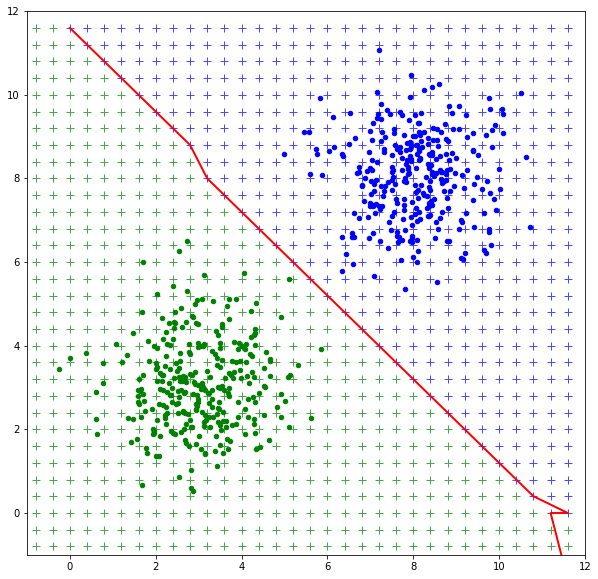

In [77]:
f, ax = plt.subplots(figsize=(10, 10))

X = np.arange(-2, 12, 0.4)
Y = X

flag = 0 # 0 - red; 1 - blue
coordinates = np.array([[0,0]])

for i in range(1, len(X)):
    for j in range(1, len(Y)):

        to_classif1 = np.log(p(np.array([X[i], Y[j]]), class_a_mu, class_a_Eps))
        to_classif2 = np.log(p(np.array([X[i], Y[j]]), class_b_mu, class_b_Eps))

        if (to_classif1 == to_classif2):
            ax.plot(X[i], Y[j], color = 'grey', marker = ',', markersize = 2, alpha = 0.5)
            
        if (to_classif1 > to_classif2):
            ax.plot(X[i],Y[j], color = 'green', marker = '+', markersize = 8, alpha = 0.7)
            if flag == 1:
                coordinates = np.vstack([coordinates, [X[i],Y[j]]])
                flag = 0
                
        else:
            ax.plot(X[i],Y[j], color = 'blue', marker = '+', markersize = 8, alpha = 0.7)
            if flag == 0:
                coordinates = np.vstack([coordinates, [X[i],Y[j]]])
                flag = 1

ax.scatter(classA[:,0], classA[:,1], color='green', s=20)
ax.scatter(classB[:,0], classB[:,1], color='blue', s=20)


coordinates = np.delete(coordinates, 0, axis=0)

coordinates = coordinates[coordinates[:,1].argsort()[::-1]]
ax.plot(coordinates[:,0], coordinates[:, 1], color="red", lw = 2)
ax.set_xlim(-1, 12)
ax.set_ylim(-1, 12)
